# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [30]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
When running the agent.py file without modifications:
- The Smartcab doesn't move at all. It stays idle.
- The driving agent receives two kinds of rewards while idle. It receives a positive reward when there is a red light, since the Smartcab doesn't move, and it receives a negative rewards when there is a red light, since it can and should move forward in this case.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
- The num_dummies flag sets the number of dummy agents in the environments, that is, the number of cars different from the Smarcab. The default value is 100. The grid_size flag sets the number of intersections of roads to (columns, rows). The update-delay flag set the continuous time between actions which by defaut is set to 2.0 seconds.
- The class function act is called when and agent performs an action, act considers the action and performs it if it's legal. It also receives a reward for the agent based on traffic rules.
- render_text() renders simulated trial data into the terminal, whereas render() renders the graphical part of the simulation.
- The next_waypoint() function first considers if the destination is in the East-West direction. 

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


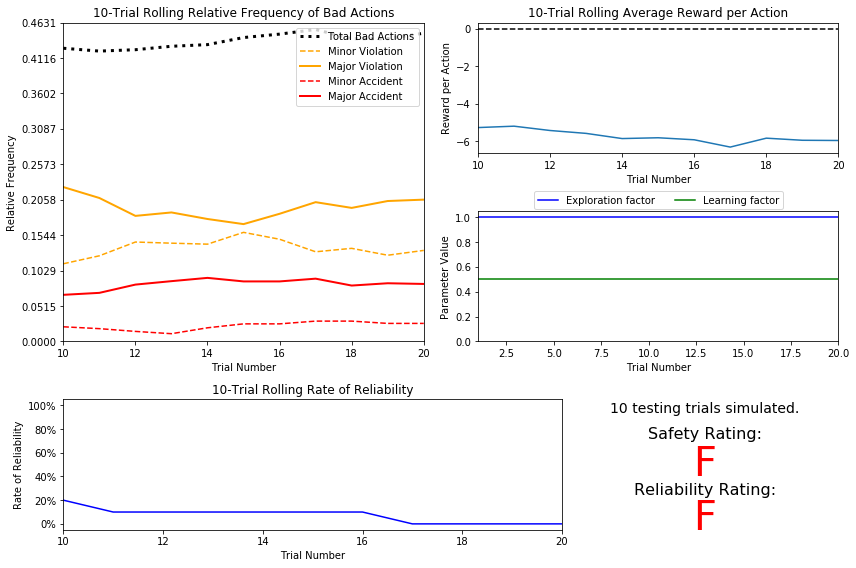

In [31]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learningQ3.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
- From the upper-left graph, one can see about 43% of the decisions that the driving agent made were bad ones. About 10% of the decisions caused minor or major accidents, that is, about 23% of the bad decisions made by the agent cause accidents.
- The rate of reliability is about 10% on average. This means that on average the agent reached the destination on time 10% of the time by driving randomly. It makes sense that the rate of reliability is low, since by driving randomly the agent could end up "anywhere" and therefore it's difficult to reach the destination in this way. This rate also depends on the size of the grid, which affects the average distance that the Smartcab needs to drive to get to the destination. So the bigger the grid, the smaller the reate of reliability for a random agent. Apart from that, it's important to notice that there are 100 dummy agents, in this case, with which the (not-so) Smartcab can crash. The more dummy agents, the lower the reliability rate. Also, another factor is the fact that there is a limited time to reach the destination (`'enforce_deadline'` flag), so this makes it even more difficult for a random agent to reach the destination, since it doesn't have enough time to (randomly) explore the grid.
- Looking at the upper-right graph, one can see that the average reward per action received by the agent is between -5 and -6. This average negative reward indicates that the agent is being penalized, more or less, as if committing a minor traffic violation all the time (based on the values of rewards in the `'environment.py'`).
- The results don't change significantly as the number of trials increases. This makes sense because the agent is not learning yet, it just keeps doing what it was doing: driving randomly.
- This Smartcab is not considered safe because its safety rating is F, which means that it causes at least one major accident (as confirmed by the solid red curve in the Frequency of Bad Actions graph). It is not considered reliable either since it also got a reliability score of F, which means that it fails to get to the destination on time for at least 60% of the trips.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**
- I think that the most relevant feature for **safety** is the `'light'`. This is because the Smartcab's safety is based on respecting the traffic rules, which, if the other cars also respect, should keep the number of crashes very low. In order increase the safety of the Smartcab, I would also include the features `'oncoming'` and `'left'`, since they relate to the traffic rules regarding turning left on a green light and right on a red light. Regarding **efficiency**, I think that the most important feature is `'waypoint'`, since the Smartcab needs to know in which direction the destination is. 
- The environment where the Smartcab exists, is a simplified city without pedestrians or obstacles different from other vehicles. These vehicles move according to traffic lights and some rules that dictate the allowed actions on intersections depending on the light colors. Therefore, it's appropriate that the Smartcab knows the colors of lights  and the inteded directions of the cars coming from its front and left in order to not crash with any vehicles and not get fines. Apart from knowing how to navigate the city safely, the purpose of the Smartcab is to reach a given destination, therefore, at each position, it needs to know where the destination is so that it can head that way.
- The feature `'right'` is not necessary, assuming the dummy vehicles respect the traffic lights and rules, and including it would make the state space 4 times bigger. As for the feature `'deadline'`, I don't think it's important because the `'waypoint'` is already kind of telling the Smartcab, what the shortest path to the destination is and knowing the time left doesn't help the Smartcab to reach earlier.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
- If the state uses `'light'`, `'oncoming'`, `'left'` and `'waypoint'`, the size of the state space is the product of the number of possible values of these features, that is, 2x4x4x3 = 96.
- In order to learn, the agent needs to reach each one of these 96 states various times and have a chance to take the 4 possible actions at each state so that it gets certain rewards that help it "understand" what are good and bad actions. That means that the Smartcab must be able to receive rewards for 96x4=384 (state, action) pairs various times. As an estimation, the average distance between the initial position of the Smartcab and the destination is 16 intersections. From the code, we know that the estimated average deadline is then 16*5=80 time steps. Since in some of these 80 time steps, que Smartcab might be in the same state, we know that, per trial, on averge, the Smartcab receives rewards for a maximum of 80 (state, action) pairs. So, on average, we need at least round(384/80) = 5 trials for the Smartcab to "observe" the 384 (state, action) pairs. Now, the Smartcab should receive information of rewards for each (state, action) pair various times, depending on how fast it learns. Let's say it needs to receive this information 40 times for each pair, then it would need about 200 trials. This seems like a reasonable number of trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

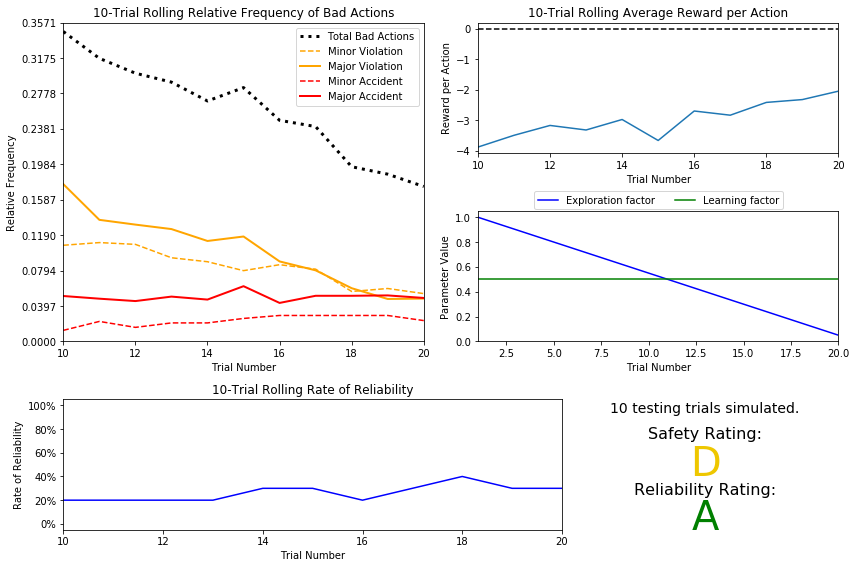

In [32]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learningQ6.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
- At train trial number 10, the rate of realiability of the default Q-learning agent was very similar to that of the basic (random) agent. However, this 10-trial rolling rate had an upward tendency for the Q-learning agent, which didn't happen for the basic agent. One can also notice that the relative frequencies of major and minor accidents were somewhat stable for both agents, although smaller for the Q-learning agent. The other frequencies and the reward per action had different behaviors for the two agents. For the Q-learning agent, the frequencies had a tendency to diminish, while for the basic agent, they were bigger and somewhat stable. The reward per action received by the Q-learning agent increased with training, whereas the reward per action for the basic agent had a slight tendency to decrease.
- The agent required 20 trials before testing. This is because I left the default tolerance of 0.05 and used the linear decay function that at each trial subtracts 0.05 to the epsilon of the previous trial. Also, in the simulator.py code, the minimum number of testing trials is set to 20.
- The decaying function is accurately represented in the parameters panel. I set the initial epsilon in `def _init_` to 1.05 because I wanted the epsilon for the first testing trial to be 1 and the epsilon for the twentieth testing trial to be 0.05.
- As seen in the previous graphs, the relative frequency of total bad actions decreased as the number of trials increased. Also, the average reward per action increased as the number of trials increased.
- After testing, the Q-learning agente obtained better safety and reliabiity ratings than the initial driving agent. The reliability rating was A, which means that the Q-learning agent reached the destination on time for at least 90% of the trips. The safety rating was D, which means that the Q-learning agent caused at least one minor accident.


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

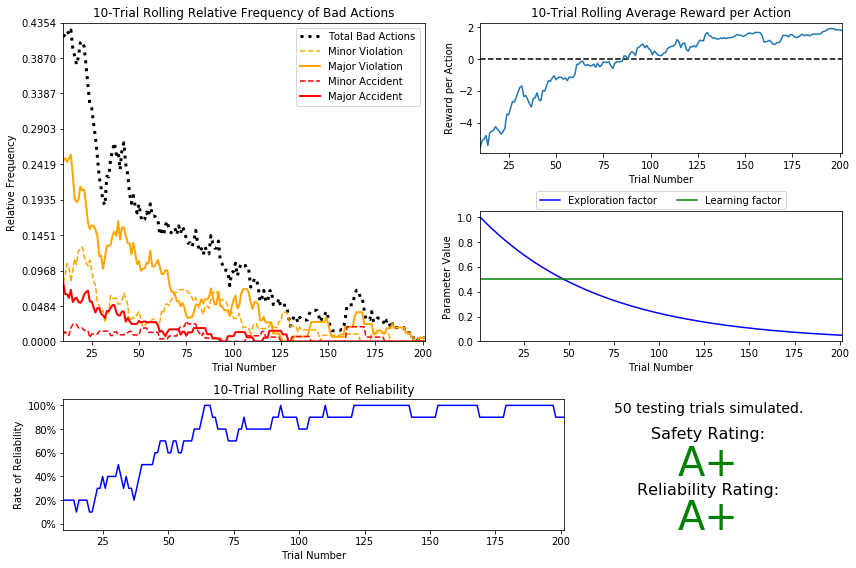

In [33]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learningQ7.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
- The chosen decaying function for the exploration factor was `epsilon = exp(-0.015*(t-1))`, `t` being the training trial number. `t-1` was used to ensure that the first value of `epsilon` was 1.
- There were 201 training trials with this decaying function.
- I used the default epsilon-tolerance of 0.05. I didn't change this tolerance because I figured that I could tune the parameter of the exponential decaying function in order to approximately determine when to stop the training trials, without changing the tolerance. I noticed that having -0.015 as the multiplier of `t-1`, I could have the agent to train for about 200 trials. As for the learning rate (alpha), I used the default rate as well, i.e., 0.5. This is because I noticed that when I chose a lower rate, for example, 0.2, 0.3 and 0.4, I obtained worse results. This effectively meant that the algorithm was giving less importance to the new obversed rewards, that is, learning more slowly. Having `alpha = 0.5` means that the agent will update the Q-values by averaging the existing value and the new observed reward. This seemed reasonable as the agent will learn at a good rate, giving importance to new observations, but at the same time it won't forget what it had learned in the past (which would happend if alpha was equal to 1). 
- When compared to the Q-learning agent that used a linearly-decaying epsilon and trained for 20 trials, this new agent improved a lot in terms of safety and a bit in terms of reliability. The new agent obtained ratings of A+ for both safety and reliability when evaluated over 50 testing trials, which means that it reached the destination on time 50 times and it never commited even a minor traffic violation or was involved in an accident. 
- I think that these results show that the driving agent succesfully learned an appropriate policy.
- I am satisfied with the ratings for this Smartcab, however, I noticed that the ratings can vary if I run the training again. I ran training, with the same parameters, in three occasions and the agent got a scores of A+ and A+ in two of them, and scores of A and A in one of them. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

1 - The optimal policy for the agent is determined by the conjunction of respecting the U.S. traffic law, and reaching the goal state on time. This policy is completely determined by telling which action to perform in each state. The states for the driving agent, in this case, are tuples of four components given by `(light, oncoming, left, waypoint)`. 

`light` tells whether the traffic light is `'green'` or `'red'`. `oncoming` tells what is the intended direction of travel of the vehicle coming from the front of the Smartcab. It can be `None` (if there is no oncoming vehicle), `'left'`, `'forward'` or `'right'`. Similarly, `left` tells the intended travel direction of the vehicle coming from the left of the Smartcab. Lastly, `waypoint` tells which travel direction leads to the destination.   

The table below summarizes the optimal policy. In this table, oncoming, left and waypoint, without single quotes, stand for any of their possible values. For example, `('red', oncoming, None, 'right')` stands for all states that have `light = 'red', left = None, waypoint = 'right'` and oncoming equal to any of its possible values, i.e., any value in the set `{'forward', 'right', 'left', None}`. Also, sets are represented by a list of values enclosed in braces, e.g., `{'right', 'forward'}`. Lastly, the minus sign represents the difference of sets, e.g., `waypoint - {'left'} = {'right', 'forward'}`.

|State|Action|
|------|------|
|`('red', oncoming, left, waypoint - {'right'})`|`None`|
|`('red', oncoming, left - {'forward'}, 'right')`|`'right'`|
|`('red', oncoming, 'forward', 'right')`|`None`|
|`('green', oncoming, left, 'right')`|`'right'`|
|`('green', oncoming, left, 'forward')`|`'forward'`|
|`('green', oncoming - {'right', 'forward'}, left, 'left')`|`'left'`|
|`('green', {'right', 'forward'}, left, 'left')`|`None`|

2 - According to the safety rating, all the actions that the agent took (the ones with the highest Q-value) were correct in the sense that no actions caused accidents or violated the law. However, some actions were different form the optimal policy described in the table above.

3 -  Let's look at some examples of optimal actions taken by the agent, given a state.

`('red', 'left', None, 'right')
 -- forward : -10.31
 -- right : 1.90
 -- None : 0.24
 -- left : -25.08`

In this case, the Smartcab agent wanted to go right, but the light was red; so it needed to check whether there was traffic coming forward from the left. Since there was no traffic coming from the left, the optimal action was turning right. The agent took this optimal action, because it had the maximum Q-value among the possible actions. 

`('green', 'left', None, 'left')
 -- forward : 0.92
 -- right : 0.54
 -- None : -4.57
 -- left : 1.53`

In this case the optimal action was turning left since the light was green and there was no oncoming traffic driving forward or turning right. The action taken by the Smartcab agent was in fact the optimal one, because left had the maximum Q-value. 

4 - Let's look at an example where the action taken by the agent was not optimal.

`('red', 'forward', 'right', 'right')
 -- forward : -4.83
 -- right : 0.00
 -- None : 0.19
 -- left : -5.30`

In this case, since the vehicle coming from the left of the Smartcab was turning right, and not driving forward, the agent could have turned right, which was the desired (optimal) action. However, the agent decided to stand still (Q-vaue = 0.19), which was safe and legal, but not optimal. Looking at the Q-values for this state, one can see that the Q-value for the action `'right'` is 0.00. Since the initial Q-value for each state-action pair is 0.00, it seems like the agent never had a chance to turn right whenever it was at this state, and therefore never learned that it was a good move. This could have happened because, in the occasions when it was in this state, the exploration factor was small and the agent had already learned that standing still at a red traffic light was a good action to take.  

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
- The Smartcab has a route planner that has the location of the destination recorded, and tells the agent, at each location, in which direction it should drive in order to reach the destination. If the Smartcab didn't have this technology, it could be neccesary that a potentially high Q-value of the destination was propagated back to the locations surrounding it so that the Smartcab tended to move closer and closer to the destination due to observing that the Q-value increased by doing so. However, the Smartcab has this GPS-like technology and therefore, it doesn't need to know future Q-values (rewards).
- Additionally, the environment is such that there is no reward assigned for moving into the destination or into places closer to the destination. The environment only gives rewards based on whether the agent took correct valid actions or invalid actions (violations) and on the time it has spent driving. None of these features depends on future states, but only on the current state which has immediate information about the environment and historic information about the time spent driving.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.